## A Sequential Neural Network multi-class classifier on the 470-feature data set.

Uses 470-400-250-150 dense layers.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Dropout
from keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

2024-04-24 17:17:06.849354: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 17:17:06.852003: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 17:17:06.885570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 17:17:07.503974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
features = df.iloc[:,0:469]
labels = df['Class']

In [4]:
X=features
y=np.ravel(labels)

In [5]:
y

array([1, 1, 1, ..., 5, 5, 5])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(9278, 469)

In [9]:
model = Sequential()
model.add(Dense(470, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(rate=.5, seed=42))
model.add(Dense(6, activation='softmax'))

2024-04-24 17:17:08.838394: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 17:17:08.838964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=500)

Epoch 1/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4527 - loss: 1.5475
Epoch 2/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 0.9727
Epoch 3/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7582 - loss: 0.7581
Epoch 4/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8104 - loss: 0.6341
Epoch 5/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8290 - loss: 0.5529
Epoch 6/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.4857
Epoch 7/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.4381
Epoch 8/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3958
Epoch 9/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3805
Epoch 10/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3618
Epoch 11/500
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8966 - loss: 0.3278
Epoch 12/500
290/290 ━━━━━━━━━━━━━━━━━━━━

In [11]:
model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9216 - loss: 1.4978


[1.7326066493988037, 0.9211207032203674]

In [12]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
y_test_pred

array([3, 3, 5, ..., 1, 5, 4])

In [14]:
confusion_matrix(y_test, y_test_pred)

array([[224,   8,   2,  12,  16],
       [ 17, 368,   9,  14,  16],
       [  0,   1, 781,   3,   1],
       [ 16,   7,   3, 456,  18],
       [ 12,   6,   7,  15, 308]])

In [15]:
multilabel_confusion_matrix(y_test,y_test_pred)

array([[[2013,   45],
        [  38,  224]],

       [[1874,   22],
        [  56,  368]],

       [[1513,   21],
        [   5,  781]],

       [[1776,   44],
        [  44,  456]],

       [[1921,   51],
        [  40,  308]]])

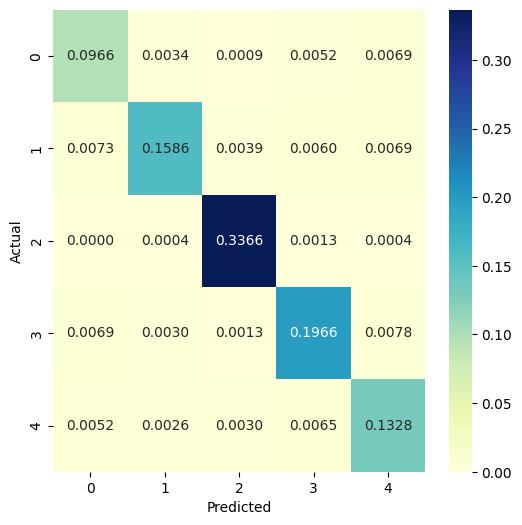

In [16]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

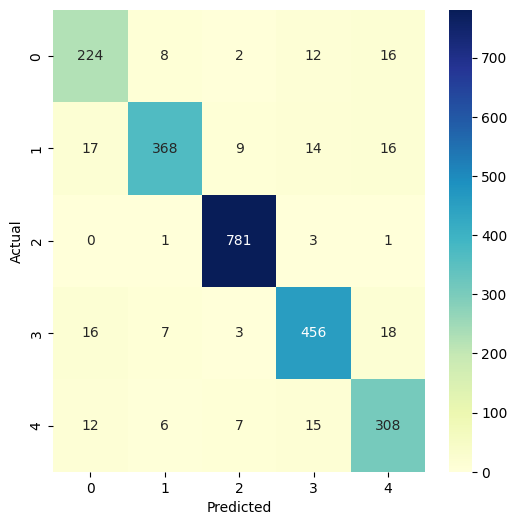

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)